# IEEE- FRAUD DETECTION USING XGBOOST AND FASTAI

## Load packages

In [1]:
import pickle
import pandas as pd
import numpy as np
from utils.data import get_data, export, balanceSample
from functools import partial
import optuna
from optuna.samplers import TPESampler
import json
# import random

## Load the dataset & artifacts

In [2]:
X_train, y_train, X_valid, y_valid,_ = get_data('data/train-balance.csv', valid_pct=0.2,hp=True)

In [3]:
# X_valid.to_csv('data/X_valid.csv', index=False)
# y_valid.to_csv('data/y_valid.csv', index=False)

## Xgboost model

In [4]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

### Define the training function

In [5]:
def train(params,X_train,y_train,X_valid,y_valid):
    model = XGBClassifier(**params)


    model.fit(
        X_train, 
        y_train, 
        eval_metric='auc', 
        eval_set=[(X_valid, y_valid)], 
        verbose=False, 
        early_stopping_rounds = 100
    )

    predictions = model.predict(X_valid)


    auc = roc_auc_score(y_valid, predictions)

    accuracy = accuracy_score(y_valid, predictions)

    print(f'Average AUC: {auc}, Average Accuracy: {accuracy}')
    return model

### Define the objective function to be maximized by Optuna

In [6]:
def objective(trial, X_train, y_train,X_valid,y_valid):

    params = {
        'booster' : trial.suggest_categorical('booster', ['gbtree']),
        'subsample' : trial.suggest_float('subsample', 0.5, 0.7),
        'colsample_bytree' : trial.suggest_float('colsample_bytree', 0.8, 1),
        'n_estimators' : trial.suggest_int('n_estimators', 200, 500),
        'objective' : 'binary:logistic',
        'scale_pos_weight' :trial.suggest_int('scale_pos_weight', 1, 20),
        'max_depth' : trial.suggest_int('max_depth', 14, 20),
        'min_child_weight' : trial.suggest_float('min_child_weight', 14, 17),
        'learning_rate' : trial.suggest_float('learning_rate', 0.004, 0.007)
    }
        
    X_train, y_train = balanceSample(X_train,y_train)
      
    model = train(params,  X_train, y_train,X_valid,y_valid)
    predictions = model.predict(X_valid)


    auc = roc_auc_score(y_valid, predictions)

    return auc

### Run Hyperparameter optimization with Optuna

In [7]:
optimization_function = partial(objective,X_train=X_train,y_train=y_train, X_valid=X_valid, y_valid=y_valid)
sampler = TPESampler(seed=42)  # Make the sampler behave in a deterministic way.
study = optuna.create_study(sampler=sampler,direction="maximize")
study.optimize(optimization_function,n_trials=10)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
params = {}
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    params[key] = value

#save the best params to a file
with open('artifacts/xgboost-params.txt', 'w') as outfile:
    json.dump(params, outfile)

[I 2021-06-20 02:43:24,890] A new study created in memory with name: no-name-5bb9bc31-ed66-4870-bd28-5c9d61a43ba8


X shape : (29587, 817), y shape: (29587,)


/opt/anaconda3/envs/ieee/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[I 2021-06-20 02:47:19,692] Trial 0 finished with value: 0.78481480585516 and parameters: {'booster': 'gbtree', 'subsample': 0.5749080237694725, 'colsample_bytree': 0.9901428612819833, 'n_estimators': 420, 'scale_pos_weight': 12, 'max_depth': 15, 'min_child_weight': 14.467983561008609, 'learning_rate': 0.004174250836504598}. Best is trial 0 with value: 0.78481480585516.


Average AUC: 0.78481480585516, Average Accuracy: 0.7014746543778801
X shape : (24285, 817), y shape: (24285,)


/opt/anaconda3/envs/ieee/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[I 2021-06-20 02:51:08,006] Trial 1 finished with value: 0.816084641090948 and parameters: {'booster': 'gbtree', 'subsample': 0.673235229154987, 'colsample_bytree': 0.9202230023486417, 'n_estimators': 413, 'scale_pos_weight': 1, 'max_depth': 20, 'min_child_weight': 16.497327922401265, 'learning_rate': 0.004637017332034829}. Best is trial 1 with value: 0.816084641090948.


Average AUC: 0.816084641090948, Average Accuracy: 0.8756682027649769
X shape : (31359, 817), y shape: (31359,)


/opt/anaconda3/envs/ieee/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[I 2021-06-20 02:53:56,852] Trial 2 finished with value: 0.7929121322813675 and parameters: {'booster': 'gbtree', 'subsample': 0.5363649934414201, 'colsample_bytree': 0.8366809019706868, 'n_estimators': 291, 'scale_pos_weight': 11, 'max_depth': 17, 'min_child_weight': 14.873687420594125, 'learning_rate': 0.005835558684167139}. Best is trial 1 with value: 0.816084641090948.


Average AUC: 0.7929121322813675, Average Accuracy: 0.715852534562212
X shape : (31308, 817), y shape: (31308,)


/opt/anaconda3/envs/ieee/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[I 2021-06-20 02:56:50,186] Trial 3 finished with value: 0.8036646012102445 and parameters: {'booster': 'gbtree', 'subsample': 0.5278987721304084, 'colsample_bytree': 0.8584289297070437, 'n_estimators': 310, 'scale_pos_weight': 10, 'max_depth': 19, 'min_child_weight': 14.599021346475078, 'learning_rate': 0.005542703315240835}. Best is trial 1 with value: 0.816084641090948.


Average AUC: 0.8036646012102445, Average Accuracy: 0.7369585253456221
X shape : (26233, 817), y shape: (26233,)


/opt/anaconda3/envs/ieee/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[I 2021-06-20 02:59:12,315] Trial 4 finished with value: 0.8437493160263521 and parameters: {'booster': 'gbtree', 'subsample': 0.6184829137724085, 'colsample_bytree': 0.8092900825439996, 'n_estimators': 382, 'scale_pos_weight': 4, 'max_depth': 14, 'min_child_weight': 16.84665661176, 'learning_rate': 0.006896896099223678}. Best is trial 4 with value: 0.8437493160263521.


Average AUC: 0.8437493160263521, Average Accuracy: 0.8264516129032258
X shape : (27897, 817), y shape: (27897,)


/opt/anaconda3/envs/ieee/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[I 2021-06-20 03:01:02,897] Trial 5 finished with value: 0.771939397918877 and parameters: {'booster': 'gbtree', 'subsample': 0.6616794696232922, 'colsample_bytree': 0.8609227538346742, 'n_estimators': 229, 'scale_pos_weight': 14, 'max_depth': 17, 'min_child_weight': 14.366114704534336, 'learning_rate': 0.0054855307303338105}. Best is trial 4 with value: 0.8437493160263521.


Average AUC: 0.771939397918877, Average Accuracy: 0.6806451612903226
X shape : (29691, 817), y shape: (29691,)


/opt/anaconda3/envs/ieee/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[I 2021-06-20 03:03:26,373] Trial 6 finished with value: 0.7650297377342645 and parameters: {'booster': 'gbtree', 'subsample': 0.5068777042230437, 'colsample_bytree': 0.9818640804157565, 'n_estimators': 277, 'scale_pos_weight': 14, 'max_depth': 16, 'min_child_weight': 15.560204063533433, 'learning_rate': 0.005640130838029839}. Best is trial 4 with value: 0.8437493160263521.


Average AUC: 0.7650297377342645, Average Accuracy: 0.6690322580645162
X shape : (31228, 817), y shape: (31228,)


/opt/anaconda3/envs/ieee/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[I 2021-06-20 03:08:03,699] Trial 7 finished with value: 0.7848658374890133 and parameters: {'booster': 'gbtree', 'subsample': 0.5369708911051054, 'colsample_bytree': 0.9939169255529117, 'n_estimators': 433, 'scale_pos_weight': 19, 'max_depth': 20, 'min_child_weight': 15.793699936433256, 'learning_rate': 0.006765622705069351}. Best is trial 4 with value: 0.8437493160263521.


Average AUC: 0.7848658374890133, Average Accuracy: 0.6980645161290323
X shape : (29459, 817), y shape: (29459,)


/opt/anaconda3/envs/ieee/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[I 2021-06-20 03:09:35,273] Trial 8 finished with value: 0.8071802545591523 and parameters: {'booster': 'gbtree', 'subsample': 0.5176985004103839, 'colsample_bytree': 0.8391965724838291, 'n_estimators': 213, 'scale_pos_weight': 7, 'max_depth': 16, 'min_child_weight': 14.814047095321687, 'learning_rate': 0.006486212527455788}. Best is trial 4 with value: 0.8437493160263521.


Average AUC: 0.8071802545591523, Average Accuracy: 0.7523502304147466
X shape : (27996, 817), y shape: (27996,)


/opt/anaconda3/envs/ieee/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[I 2021-06-20 03:12:23,069] Trial 9 finished with value: 0.8506812089543815 and parameters: {'booster': 'gbtree', 'subsample': 0.5713506653387178, 'colsample_bytree': 0.8561869019374762, 'n_estimators': 363, 'scale_pos_weight': 3, 'max_depth': 19, 'min_child_weight': 14.223651931039312, 'learning_rate': 0.006960660809801553}. Best is trial 9 with value: 0.8506812089543815.


Average AUC: 0.8506812089543815, Average Accuracy: 0.8506912442396314
Number of finished trials:  10
Best trial:
  Value: 0.8506812089543815
  Params: 
    booster: gbtree
    subsample: 0.5713506653387178
    colsample_bytree: 0.8561869019374762
    n_estimators: 363
    scale_pos_weight: 3
    max_depth: 19
    min_child_weight: 14.223651931039312
    learning_rate: 0.006960660809801553


### Retrain the model with the best parameters

In [8]:
with open('artifacts/catboost-params.txt') as json_file:
        params = json.load(json_file)

In [9]:
model = train(params,X_train,y_train,X_valid,y_valid)

/opt/anaconda3/envs/ieee/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:12:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "custom_metric", "iterations", "loss_function" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Average AUC: 0.8307946535435883, Average Accuracy: 0.8800921658986175


In [10]:
predictions = model.predict(X_valid)
auc_1 = roc_auc_score(y_valid, predictions)
auc_1

0.8307946535435883

### Save the model

In [11]:
model_filename = './artifacts/xgboost-model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

### Analyse the model

In [12]:
from explainerdashboard import ClassifierExplainer, InlineExplainer

In [13]:
explainer = ClassifierExplainer(model, X_valid, y_valid)

Detected XGBClassifier model: Changing class type to XGBClassifierExplainer...
Note: model_output=='probability'. For XGBClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...


In [14]:
# ie = InlineExplainer(explainer)

In [15]:
# ie.classifier.confusion_matrix()

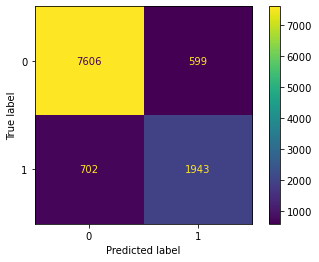

In [16]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(model, X_valid, y_valid)  
plt.show()

In [17]:
#ie.importances()

In [18]:
df_importances = explainer.get_importances_df()

Calculating shap values...


 99%|===================| 10758/10850 [00:41<00:00]        

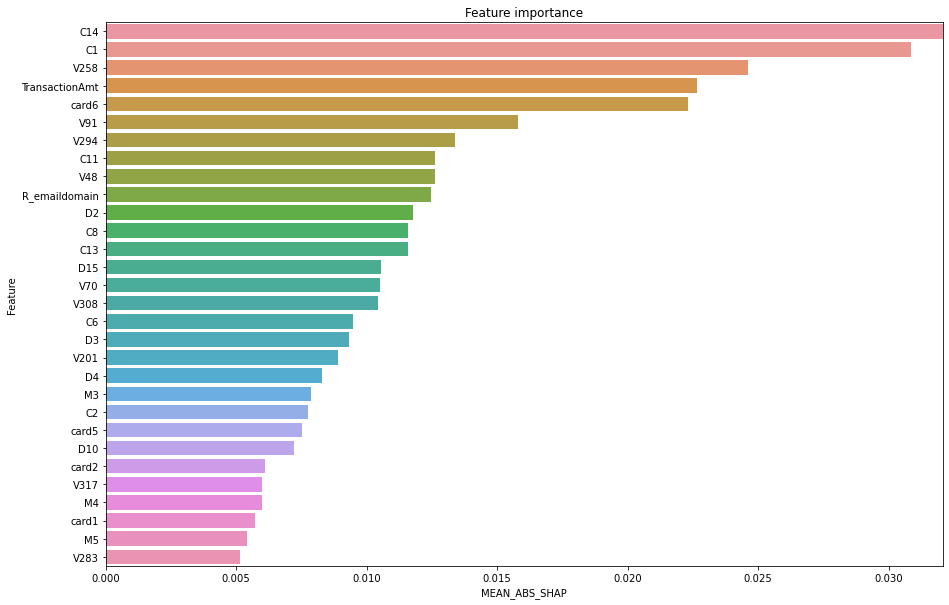

In [19]:
import seaborn as sns
plt.figure(figsize=(15, 10))
ax = sns.barplot(x="MEAN_ABS_SHAP", y="Feature", data=df_importances[:30], orient="h")
ax.set_xlim(df_importances["MEAN_ABS_SHAP"].min(), df_importances["MEAN_ABS_SHAP"].max())
plt.title('Feature importance')
plt.show()

### Retrain the model with only important features and compare it to the model with all features

In [20]:
important_cols = df_importances[df_importances['MEAN_ABS_SHAP']>0].Feature.values.tolist()

In [21]:
model2 = train(params, X_train[important_cols], y_train, X_valid[important_cols], y_valid)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[03:13:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "custom_metric", "iterations", "loss_function" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Average AUC: 0.8314413614272269, Average Accuracy: 0.8799078341013825


In [22]:
predictions = model2.predict(X_valid[important_cols])
auc_2 = roc_auc_score(y_valid, predictions)
auc_2

0.8314413614272269

### Save important features and useless features so that you can use them later if needed

In [23]:
not_important_cols = df_importances[df_importances['MEAN_ABS_SHAP']==0].Feature.values.tolist()

In [24]:
noneNa_not_important_cols = [c.split('_na')[0] for c in not_important_cols]
noneNa_important_cols = [c.split('_na')[0] for c in important_cols]

In [25]:
useless = set(noneNa_not_important_cols).difference(set(noneNa_important_cols))

In [26]:
feature_imp = {}
feature_imp['useless']  = list(useless)
feature_imp['important'] = important_cols
with open('artifacts/xgboost-feature-importance.txt', 'w') as outfile:
    json.dump(feature_imp, outfile)

## Fit the model to the test set

In [27]:
df_test = pd.read_csv('data/test.csv', low_memory=False)

In [28]:
df_test.shape

(506691, 436)

### Prepocess the test set

In [29]:
with open('artifacts/data-proc.pkl', 'rb') as preproc_file:
    preproc = pickle.load(preproc_file)

    data_proc = preproc.train.new(df_test)
    data_proc.process()

### Use the model that showed good performance between the model with all features vs the one with only important features

In [45]:
if auc_1 < auc_2:
    y_test_hat = model2.predict_proba(data_proc.train.xs[important_cols])[:,1]
else: 
    y_test_hat = model.predict_proba(data_proc.train.xs)[:,1]

In [81]:
df_test.shape

(506691, 437)

In [46]:
y_test_hat.shape

(506691,)

In [47]:
df_test['isFraud'] = y_test_hat

In [48]:
df_test[['TransactionID']].duplicated().any()

False

## Submit the result to Kaggle for evaluation

In [49]:
df_test[['TransactionID', 'isFraud']].to_csv('data/submission_xgboost_v1.csv', index=False)

In [50]:
!kaggle competitions submit -c ieee-fraud-detection -f data/submission_v2.csv -m "first submission without any deep feature engineering. just using fastai and xgboost"

100%|██████████████████████████████████████| 9.10M/9.10M [00:09<00:00, 1.03MB/s]
Successfully submitted to IEEE-CIS Fraud Detection

In [51]:
import gc
gc.collect()

71